The UCB1 (Upper Confidence Bound 1) algorithm is a popular strategy used to solve the multi-armed bandit problem, which is a classic problem in reinforcement learning and decision-making. UCB1 is designed to balance exploration and exploitation efficiently by assigning each arm an upper confidence bound and selecting the arm with the highest upper bound.

Here's an explanation of the UCB1 theory and how it works:

Problem Background:

In the multi-armed bandit problem, you are faced with a set of bandit arms, each associated with an unknown probability distribution for generating rewards.
Your goal is to maximize the total cumulative reward over a series of trials (or pulls) by selecting the bandit arms in a way that balances exploration (trying different arms to learn their rewards) and exploitation (selecting the arm with the highest expected reward).
UCB1 Algorithm:

UCB1 is an algorithm that iteratively selects bandit arms based on their upper confidence bounds. The key idea is to prioritize arms that have not been explored sufficiently or arms that have the potential for high rewards based on current knowledge.

At each time step t, the algorithm selects the arm with the highest upper confidence bound. The formula for the upper confidence bound of arm i at time t is as follows:

UCB_i(t) = m_i(t) + sqrt(2 * log(t) / n_i(t))

Where:

UCB_i(t) is the upper confidence bound of arm i at time t.
m_i(t) is the estimated mean reward of arm i at time t.
n_i(t) is the number of times arm i has been pulled up to time t.
log(t) is the natural logarithm of the total number of time steps.
Balancing Exploration and Exploitation:

The term m_i(t) represents the current estimate of the expected reward for arm i. Arms with higher estimated rewards will have higher UCBs, making them more likely to be selected.
The term sqrt(2 * log(t) / n_i(t)) represents the exploration bonus. It encourages the algorithm to explore arms that have been pulled fewer times or have uncertain reward estimates.
As t increases (more time steps), the exploration bonus diminishes, and the algorithm gradually shifts towards exploitation by selecting arms with higher estimated rewards.
Benefits of UCB1:

UCB1 provides a principled way to balance exploration and exploitation, avoiding excessive exploration of suboptimal arms once their rewards are well-estimated.
It has been proven to achieve logarithmic regret, which means that its total regret (the difference between the cumulative reward obtained by the algorithm and the cumulative reward obtained by always selecting the best arm) grows logarithmically with the number of time steps.
Limitations and Considerations:

UCB1 assumes that the reward distributions for the arms are stationary (do not change over time). It may not perform well in non-stationary environments.
The algorithm's performance can be sensitive to the choice of exploration constant in the UCB formula.
In summary, the UCB1 algorithm is an effective approach for solving the multi-armed bandit problem by assigning upper confidence bounds to each arm and selecting the arm with the highest upper bound at each time step. It balances exploration and exploitation efficiently and achieves logarithmic regret, making it a valuable tool for decision-making in various applications.

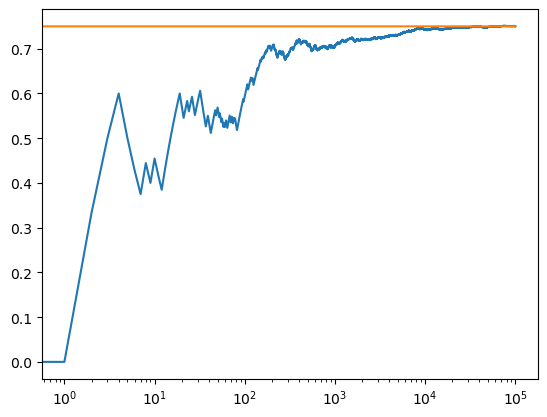

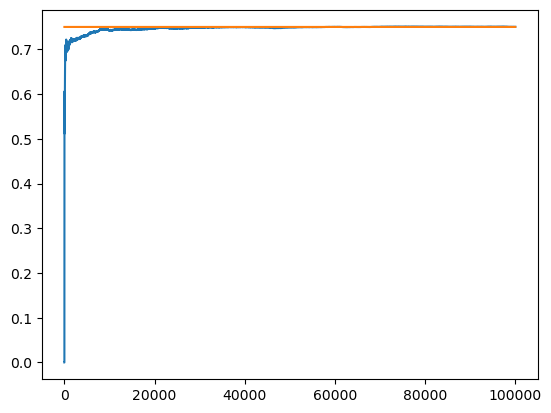

0.23170731707317077
0.5218508997429309
0.7515773821484542
Total reward earned: 75028.0
Overall win rate: 0.75028
Num times selected each bandit: [82, 389, 99532]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def pull_bandit(p):
    return np.random.random() < p

def update_estimate(p_estimate, N, x):
    N += 1
    p_estimate = ((N - 1) * p_estimate + x) / N
    return p_estimate, N

def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj)

def run_experiment():
    p_estimates = [0.0, 0.0, 0.0]
    num_samples = [0.0, 0.0, 0.0]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

    # Initialization: Play each bandit once
    for j in range(len(BANDIT_PROBABILITIES)):
        x = pull_bandit(BANDIT_PROBABILITIES[j])
        total_plays += 1
        p_estimates[j], num_samples[j] = update_estimate(p_estimates[j], num_samples[j], x)

    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(p_estimates[k], total_plays, num_samples[k]) for k in range(len(BANDIT_PROBABILITIES))])
        x = pull_bandit(BANDIT_PROBABILITIES[j])
        total_plays += 1
        p_estimates[j], num_samples[j] = update_estimate(p_estimates[j], num_samples[j], x)

        # For the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # Plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

    # Plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

    for p_estimate in p_estimates:
        print(p_estimate)

    print("Total reward earned:", rewards.sum())
    print("Overall win rate:", rewards.sum() / NUM_TRIALS)
    print("Num times selected each bandit:", [int(N) for N in num_samples])

    return cumulative_average

if __name__ == '__main__':
    run_experiment()


This code is an implementation of the UCB1 (Upper Confidence Bound 1) algorithm for solving the multi-armed bandit problem. Let me explain each part of the code:

Import Statements:

The code begins with import statements to bring in necessary libraries, including NumPy for numerical operations and Matplotlib for plotting.
Constants and Parameters:

NUM_TRIALS: The number of trials or time steps in the bandit problem.
EPS: Not used in this version, but it's a placeholder for epsilon-greedy exploration (commonly used in bandit algorithms).
BANDIT_PROBABILITIES: A list that defines the true probabilities of success for each bandit arm. In this example, there are three arms with success probabilities of 0.2, 0.5, and 0.75.
Functions:

pull_bandit(p): Simulates pulling a bandit arm with a given success probability p. It returns True with probability p and False otherwise.
update_estimate(p_estimate, N, x): Updates the estimate of the success probability p_estimate based on the new observation x and the total number of samples N. It calculates a weighted average of the previous estimate and the new observation.
ucb(mean, n, nj): Computes the Upper Confidence Bound (UCB) for a bandit arm with the given mean estimate mean, the total number of plays n, and the number of plays for that arm nj.
Main Function - run_experiment():

Initializes variables to keep track of estimated probabilities (p_estimates), the number of samples collected for each arm (num_samples), and an array to store rewards (rewards).
The code performs initialization by playing each bandit arm once and updating the estimates based on the observed rewards.
It then runs a loop for NUM_TRIALS iterations to simulate the bandit problem.
Inside the loop:
It selects the arm with the highest UCB based on the current estimates and number of plays.
Pulls the selected arm and observes the reward (x).
Updates the estimates and sample counts for the selected arm.
Records the reward in the rewards array.
Calculates the cumulative average reward over time and plots it.
Prints the final estimates, total reward earned, overall win rate, and the number of times each bandit arm was selected.
Running the Experiment:

The code checks if it is being run as the main script (if __name__ == '__main__':) and calls the run_experiment() function to run the bandit problem.
The UCB1 algorithm selects arms to maximize the upper confidence bounds, which encourages exploration of arms with uncertain rewards while exploiting arms with high estimated rewards. The code visualizes the algorithm's performance and provides estimates of the bandit arms' success probabilities as it runs the experiment.